# LOAN APPROVAL PREDICTION - FINAL PREDICTION

## Importing the libraries

In [1]:
import joblib as jb
feature_selection=jb.load('files/train/model/feature_selected_model.pkl')
encode_model=jb.load('files/train/model/train_encode_model.pkl')
model=jb.load('files/train/model/lor.pkl')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

**Create a def function called flow that takes two parameters as x_path,y_path. The steps for creating the def function is as folllows**

In [3]:
def flow(x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    #encode
    encode_data=encode_model.transform(x_test)
    encode_data=pd.DataFrame(encode_data,columns=x_test.columns)
    y_test=y_test.replace({' Approved':1,' Rejected':0})
    
    #feature selection
    feature_selected=encode_data[feature_selection]
    
    #predict
    y_pred=pd.DataFrame(model.predict(feature_selected))
    
    #metrics
    report=classification_report(y_pred,y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,cm,disp

In [4]:
y_pred,report,cm,disp=flow('test data/x.csv','test data/y.csv')

In [5]:
y_pred

,0
0,1
1,1
2,0
3,1
4,1
...,...
1276,1
1277,1
1278,0
1279,1


In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       420
           1       0.92      0.83      0.87       861

    accuracy                           0.84      1281
   macro avg       0.82      0.84      0.83      1281
weighted avg       0.85      0.84      0.84      1281



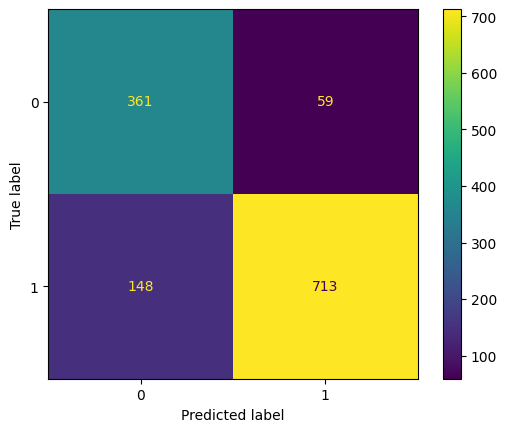

In [7]:
disp.plot()